# Credit Card Fraud detection Data

For my final project I choose the credit card fraud detection data set, from :"https://www.kaggle.com/dalpozz/creditcardfraud"

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
df_creditcard = pd.read_csv('creditcard.csv', ",")
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_creditcard.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000




The dataset contains transactions made by cardholders. This dataset presents 284.807 transactions that occurred in two days.

V(i) represent only numerical input , which are the principal components from the original dataset. The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 


In [4]:
classes = pd.value_counts(df_creditcard['Class'], sort = True).sort_index()


In [5]:
classes


0    284315
1       492
Name: Class, dtype: int64

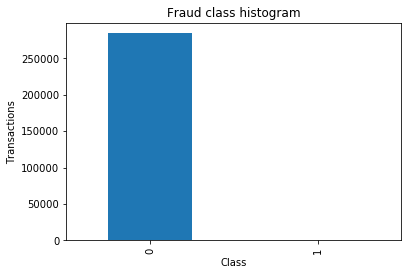

In [6]:
classes.plot(kind = 'bar')
plt.title('Fraud')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Transactions")
plt.show()

As we can see the data set is highly unbalanced, only 492 cases of fraud over 284807 transactions.

The objective of my project is to discover which are the main features "V(i)", that will help us to discover fraudolent transactions.

My intention is to create models using: Logistic Regression, SVMs, Decision trees, K-nearest neighbors, select the meaningful features. 
I'll apply cross validation for hyperparameter tuning on each different classification models.
The main task here is to found  the best model for unbalanced dataset, where there is an overwhelming class.


AUC maximization aproach is much better choice.

In [7]:
from sklearn.preprocessing import StandardScaler
df_creditcard['normAmount'] = StandardScaler().fit_transform(df_creditcard['Amount'].values.reshape(-1, 1))
df_creditcard = df_creditcard.drop(['Time','Amount'],axis=1)
df_creditcard.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


Divide the sample into dependente variable y ( Class) and independent variable X

In [8]:
y = (df_creditcard['Class'].values)
X = df_creditcard.drop(['Class'], axis=1)

Standardazie the values of the independent variable X

In [9]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(X)

Divide the sample into train set and test set

In [10]:
from sklearn.model_selection import train_test_split
X_std_train, X_std_test, y_train, y_test = \
train_test_split(X_std, y, test_size=0.3, random_state=0)

Estimate the logistic function on the set test 

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_std_train, y_train)
lr_train_pred=lr.predict(X_std_train)
lr_test_pred= lr.predict(X_std_test)

Calculate the residual sum of square of the training set and for the test set

In [12]:
rss_train=sum((lr_train_pred-y_train)*(lr_train_pred-y_train))
rss_test=sum((lr_test_pred-y_test)*(lr_test_pred-y_test))
print(rss_train,rss_test)

159 68


In [13]:
from sklearn.metrics import mean_squared_error,accuracy_score
print('LogisticRegression\nTrain Accuracy: %.3f Test Accuracy:%.3f'%(accuracy_score(y_train,lr_train_pred),
accuracy_score(y_test,lr_test_pred)))
print('Train MSE: %.3f Test MSE: %.3f'%(mean_squared_error(y_train,lr_train_pred),mean_squared_error(y_test,lr_test_pred)))

LogisticRegression
Train Accuracy: 0.999 Test Accuracy:0.999
Train MSE: 0.001 Test MSE: 0.001


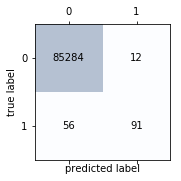

In [14]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=lr_test_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [15]:
result=np.matrix(confmat)
ERR_fraud=(result[1,0])/(result[1,0]+result[1,1])
ERR_fraud

0.38095238095238093

We want to reduce the misclassification error of the fraudolent transactions, let's try using Pipeline

In [16]:
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_std_train, y_train)
print('logistic Rgression Test Accuracy: %.3f' % pipe_lr.score(X_std_test, y_test))
y_pred = pipe_lr.predict(X_std_test)

logistic Rgression Test Accuracy: 0.999


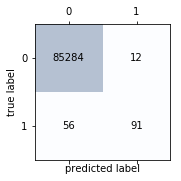

In [17]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [18]:
result=np.matrix(confmat)


ERR_fraud=(result[1,0])/(result[1,0]+result[1,1])
ERR_fraud


0.38095238095238093

Let's try to estimate a Logistic regression on the undersample of the data. We create a smaller sample from the original, with the same number of fraudolent transactions, and a proportional number of non-fraudolent transactions, in order to identify the feauters of the fraudolent transactions

We undersample the data and obtain  classes 12:1. 

In [19]:
def undersample(df_creditcard, ratio=12):
    fraud = df_creditcard[df_creditcard.Class == 1]
    oth = df_creditcard[df_creditcard.Class == 0].sample(n=ratio*len(fraud))
    return pd.concat([fraud, oth]).sample(frac=1) #shuffle the data
df_creditcard_under = undersample (df_creditcard)

In [20]:
y_u = df_creditcard_under.Class
X_u= df_creditcard_under.drop('Class', axis=1)

In [21]:
stdsc=StandardScaler()
X_u_std=stdsc.fit_transform(X_u)
pd.DataFrame(X_u_std).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,6396.0,-2.816349e-18,1.000078,-14.207646,-0.238913,0.079741,0.555866,0.924100
1,6396.0,1.765860e-17,1.000078,-19.039105,-0.387796,-0.065871,0.310221,10.086709
2,6396.0,5.103277e-18,1.000078,-9.939554,-0.210004,0.197491,0.487364,1.470592
3,6396.0,-2.640165e-17,1.000078,-2.453075,-0.566070,-0.111881,0.326897,5.961457
4,6396.0,-3.660820e-17,1.000078,-10.591249,-0.248543,0.070784,0.395793,6.405646
5,6396.0,1.056131e-18,1.000078,-7.523946,-0.518647,-0.158921,0.325819,10.324734
6,6396.0,8.626968e-18,1.000078,-15.842623,-0.093518,0.142955,0.346139,10.506549
7,6396.0,1.299253e-17,1.000078,-19.142371,-0.122037,-0.002669,0.159058,9.302636
8,6396.0,2.030896e-18,1.000078,-9.177707,-0.409426,0.052857,0.519069,4.969177
9,6396.0,-3.672970e-17,1.000078,-10.621324,-0.105380,0.118028,0.363588,5.485318


In [22]:
from sklearn.model_selection import train_test_split
X_u_std_train, X_u_std_test, y_u_train, y_u_test = \
train_test_split(X_u_std, y_u, test_size=0.3, random_state=0)

In [23]:
from sklearn.linear_model import LogisticRegression
lr_u = LogisticRegression(C=100, random_state=0)

lr_u.fit(X_u_std_train, y_u_train)
lr_u_train_pred=lr_u.predict(X_u_std_train)
lr_u_test_pred= lr_u.predict(X_u_std_test)

In [24]:
rss_u_train=sum((lr_u_train_pred-y_u_train)*(lr_u_train_pred-y_u_train))
rss_u_test=sum((lr_u_test_pred-y_u_test)*(lr_u_test_pred-y_u_test))
print(rss_u_train,rss_u_test)

55 26


In [25]:
from sklearn.metrics import mean_squared_error,accuracy_score
print('LogisticRegressionU\nTrain Accuracy: %.3f Test Accuracy:%.3f'%(accuracy_score(y_u_train,lr_u_train_pred),
accuracy_score(y_u_test,lr_u_test_pred)))
print('Train MSE: %.3f Test MSE: %.3f'%(mean_squared_error(y_u_train,lr_u_train_pred),mean_squared_error(y_u_test,lr_u_test_pred)))

LogisticRegressionU
Train Accuracy: 0.988 Test Accuracy:0.986
Train MSE: 0.012 Test MSE: 0.014


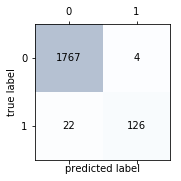

In [26]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_u_test, y_pred=lr_u_test_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()


In [27]:
result=np.matrix(confmat)

ERR_fraud=(result[1,0])/(result[1,0]+result[1,1])
ERR_fraud


0.14864864864864866

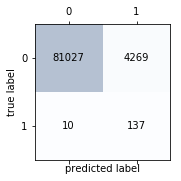

0.050080170406001663

In [28]:
y_c_pred = lr_u.predict(X_std_test)

from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true=y_test, y_pred=y_c_pred)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
                s=confmat[i, j],
                va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

result=np.matrix(confmat)

ERR=(result[0,1]+result[1,0])/(result[0,0]+result[0,1]+result[1,0]+result[1,1])
ERR



In [29]:
ERR_fraud=(result[1,0])/(result[1,0]+result[1,1])
ERR_fraud

0.068027210884353748

Try to tune the best value for the parameter C

In [ ]:

C_s = np.logspace(-1, 3, 11)
scores = list()
scores_std = list()
lr = LogisticRegression(penalty = 'l1')

for C in C_s:
    lr.C = C
    scores_cv = cross_val_score(lr, X_u_std_test, y_u_test, cv=10,scoring='roc_auc')
    scores.append(np.mean(scores_cv))
    scores_std.append(np.std(scores_cv))
    


In [ ]:
lr_results = pd.DataFrame({'score':scores, 'C':C_s}) 
lr_results